# Hierarchische Clusteranalyse (HCA)

In [54]:
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

# generate data
X, y = make_blobs(n_samples=60, n_features=2, centers=3, random_state=1)

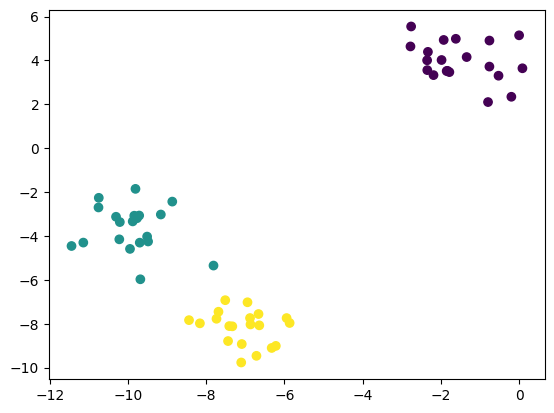

In [16]:
plt.scatter(*X.T, c=y)
plt.show()

Relevante Größen für das HCA ist das 
- _dissimilarity measure_, ein Unterschiedlichkeitsmaß auf Ebene der Datenpunkte (z.B. euklidische Distanz oder Korrelationskoeffizient) und 
- _linkage_, ein Unterschiedlichkeitsmaß auf Ebene der Cluster (z.B. complete, single, average).

Beim **Complete Linkage** (maximale Inter-Cluster-Unterschiedlichkeit) werden alle paarweisen Unterschiedlichkeiten zwischen Punkten aus dem ersten und Punkten aus dem zweiten Cluster bestimmt und das Maximum genommen.

Beim **Single Linkage** (minimale Inter-Cluster-Unterschiedlichkeit) wird die minimale paarweise Unterschiedlichkeit zwischen den Punkten aus den Clustern verwendet.

Beim **Average Linkage** (mittlere Inter-Cluster-Unterschiedlichkeit) wird der Mittelwert der paarweisen Unterschiedlichkeiten zwischen den Punkten aus den Clustern verwendet.

In [12]:
def dissimilarity(x1, x2) -> float:
    return np.linalg.norm(x1 - x2)

def linkage(C1, C2, type: str = 'average') -> float:
    diss_pairs: list[float] = []
    for c1 in C1:
        for c2 in C2:
           assert c1 != c2, "Hier ist ein Punkt doppelt?!"
           diss_pairs.append(dissimilarity(c1, c2))
    
    diss_np: np.ndarray = np.array(diss_pairs)
    if type == 'average':
        return diss_np.mean()
    elif type == 'single':
        return diss_np.min()
    elif type == 'complete':
        return diss_np.max()

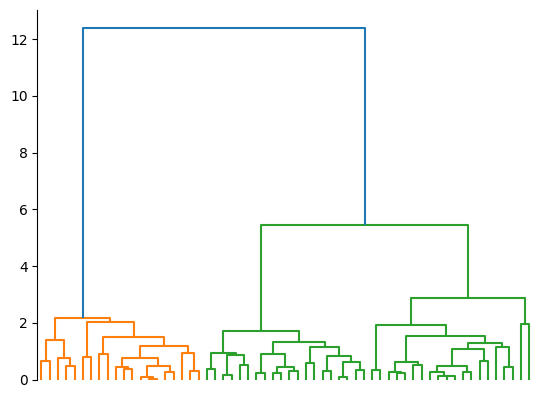

In [28]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(X, 'average')

fig, axs = plt.subplots(1, 1)
dn = hierarchy.dendrogram(Z, truncate_mode='none', show_leaf_counts=True, no_labels=True)
#plt.axis('off')

axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['bottom'].set_visible(False)

plt.show()

In [19]:
Z

array([[1.50000000e+01, 3.10000000e+01, 2.17280603e-02, 2.00000000e+00],
       [7.00000000e+00, 3.40000000e+01, 7.84081035e-02, 2.00000000e+00],
       [1.40000000e+01, 6.00000000e+01, 8.01486344e-02, 3.00000000e+00],
       [4.10000000e+01, 4.30000000e+01, 1.25870441e-01, 2.00000000e+00],
       [3.90000000e+01, 6.30000000e+01, 1.34498817e-01, 3.00000000e+00],
       [9.00000000e+00, 1.00000000e+01, 1.41502638e-01, 2.00000000e+00],
       [5.00000000e+01, 5.20000000e+01, 2.19544043e-01, 2.00000000e+00],
       [2.20000000e+01, 2.80000000e+01, 2.29017234e-01, 2.00000000e+00],
       [2.50000000e+01, 4.50000000e+01, 2.36786207e-01, 2.00000000e+00],
       [5.70000000e+01, 6.40000000e+01, 2.52907290e-01, 4.00000000e+00],
       [1.30000000e+01, 1.60000000e+01, 2.60230122e-01, 2.00000000e+00],
       [4.70000000e+01, 5.90000000e+01, 2.77771987e-01, 2.00000000e+00],
       [2.70000000e+01, 6.60000000e+01, 2.79279277e-01, 3.00000000e+00],
       [1.20000000e+01, 3.30000000e+01, 2.84149341e

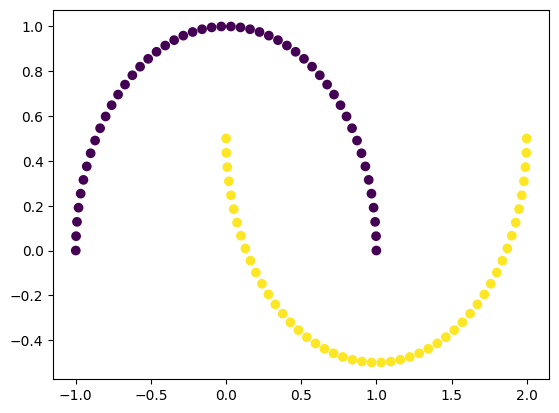

In [29]:
from sklearn.datasets import make_moons
[X2, y2] = make_moons(random_state=1)

plt.scatter(*X2.T, c=y2)
plt.show()

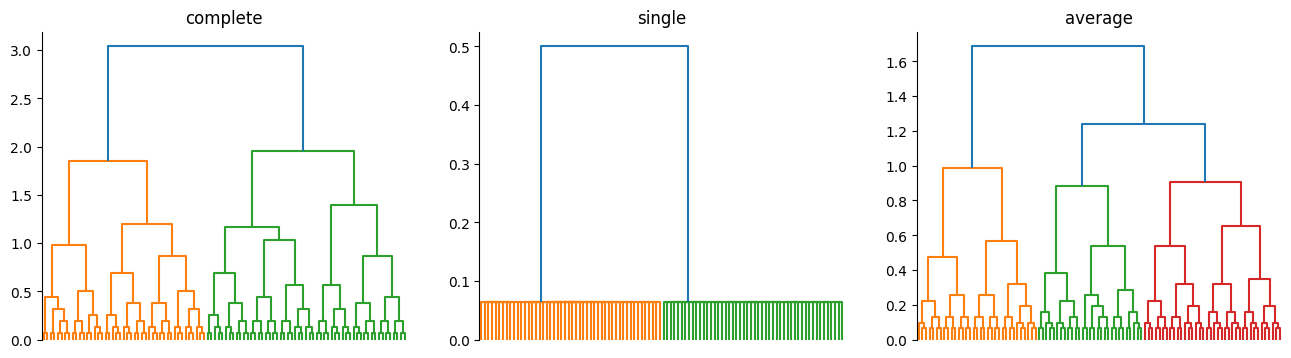

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

for i, m in enumerate(['complete', 'single', 'average']):
    Z = hierarchy.linkage(X2, m)
    hierarchy.dendrogram(Z, truncate_mode='none', show_leaf_counts=True, no_labels=True, ax=axs[i])

    axs[i].set_title(m)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)

plt.show()

Nun mit NumPY

In [62]:
import numpy as np

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

def calculate_pairwise_distances(X):
    n = X.shape[0]
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            distances[i, j] = euclidean_distance(X[i], X[j])
            distances[j, i] = distances[i, j]
    return distances

def find_clusters_to_merge(distances):
    n = distances.shape[0]
    min_distance = np.inf
    clusters_to_merge = (-1, -1)
    for i in range(n):
        for j in range(i + 1, n):
            if distances[i, j] < min_distance:
                min_distance = distances[i, j]
                clusters_to_merge = (i, j)
    return clusters_to_merge, min_distance

def average_linkage_clustering(X):
    n = X.shape[0]
    clusters = {i: [i] for i in range(n)}
    distances = calculate_pairwise_distances(X)
    Z = np.zeros((n - 1, 4))

    for k in range(n - 1):
        print(f"Iteration {k}:")
        print("Current clusters:", clusters)
        (i, j), min_distance = find_clusters_to_merge(distances)
        print(f"Clusters to merge: {i}, {j} with distance {min_distance}")

        if i == -1 or j == -1:
            break
            raise ValueError("Error in finding clusters to merge. Check distance calculations.")

        cluster_i = clusters.pop(i)
        cluster_j = clusters.pop(j)
        new_cluster = cluster_i + cluster_j
        print(f"New cluster: {new_cluster}")

        # Update the distances for the new cluster
        for l in clusters.keys():
            if l != i and l != j:  # skip the clusters being merged
                distances[i, l] = np.mean([distances[p, l] for p in new_cluster if p != l])
                distances[l, i] = distances[i, l]

        clusters[i] = new_cluster
        distances[j, :] = np.inf
        distances[:, j] = np.inf

        Z[k, 0] = min(cluster_i[0], cluster_j[0])  # Use minimum index for consistency
        Z[k, 1] = max(cluster_i[0], cluster_j[0])  # Use maximum index for consistency
        Z[k, 2] = min_distance
        Z[k, 3] = len(new_cluster)
        print("Updated distances:\n", distances)

    return Z

# Beispielaufruf:
#X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
#Z = average_linkage_clustering(X)
#print("Final linkage matrix:\n", Z)

In [63]:
Z = average_linkage_clustering(X2)
Z

Iteration 0:
Current clusters: {0: [0], 1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7], 8: [8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25], 26: [26], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 32: [32], 33: [33], 34: [34], 35: [35], 36: [36], 37: [37], 38: [38], 39: [39], 40: [40], 41: [41], 42: [42], 43: [43], 44: [44], 45: [45], 46: [46], 47: [47], 48: [48], 49: [49], 50: [50], 51: [51], 52: [52], 53: [53], 54: [54], 55: [55], 56: [56], 57: [57], 58: [58], 59: [59], 60: [60], 61: [61], 62: [62], 63: [63], 64: [64], 65: [65], 66: [66], 67: [67], 68: [68], 69: [69], 70: [70], 71: [71], 72: [72], 73: [73], 74: [74], 75: [75], 76: [76], 77: [77], 78: [78], 79: [79], 80: [80], 81: [81], 82: [82], 83: [83], 84: [84], 85: [85], 86: [86], 87: [87], 88: [88], 89: [89], 90: [90], 91: [91], 92: [92], 93: [93], 94: [94], 95: [95], 96: [96], 97: [97], 98: [98]

array([[3.40000000e+01, 5.70000000e+01, 6.41031551e-02, 2.00000000e+00],
       [1.00000000e+00, 4.40000000e+01, 6.41031551e-02, 2.00000000e+00],
       [2.00000000e+00, 3.90000000e+01, 6.41031551e-02, 2.00000000e+00],
       [2.90000000e+01, 9.90000000e+01, 6.41031551e-02, 2.00000000e+00],
       [1.10000000e+01, 3.50000000e+01, 6.41031551e-02, 2.00000000e+00],
       [2.80000000e+01, 6.40000000e+01, 6.41031551e-02, 2.00000000e+00],
       [1.70000000e+01, 4.60000000e+01, 6.41031551e-02, 2.00000000e+00],
       [5.00000000e+01, 6.30000000e+01, 6.41031551e-02, 2.00000000e+00],
       [2.20000000e+01, 7.50000000e+01, 6.41031551e-02, 2.00000000e+00],
       [6.00000000e+00, 2.50000000e+01, 6.41031551e-02, 2.00000000e+00],
       [2.60000000e+01, 3.30000000e+01, 6.41031551e-02, 2.00000000e+00],
       [3.00000000e+00, 7.00000000e+00, 6.41031551e-02, 2.00000000e+00],
       [6.50000000e+01, 6.90000000e+01, 6.41031551e-02, 2.00000000e+00],
       [4.00000000e+00, 1.00000000e+01, 6.41031551e

Iteration 0:
Current clusters: {0: [0], 1: [1], 2: [2], 3: [3], 4: [4], 5: [5], 6: [6], 7: [7], 8: [8], 9: [9], 10: [10], 11: [11], 12: [12], 13: [13], 14: [14], 15: [15], 16: [16], 17: [17], 18: [18], 19: [19], 20: [20], 21: [21], 22: [22], 23: [23], 24: [24], 25: [25], 26: [26], 27: [27], 28: [28], 29: [29], 30: [30], 31: [31], 32: [32], 33: [33], 34: [34], 35: [35], 36: [36], 37: [37], 38: [38], 39: [39], 40: [40], 41: [41], 42: [42], 43: [43], 44: [44], 45: [45], 46: [46], 47: [47], 48: [48], 49: [49], 50: [50], 51: [51], 52: [52], 53: [53], 54: [54], 55: [55], 56: [56], 57: [57], 58: [58], 59: [59], 60: [60], 61: [61], 62: [62], 63: [63], 64: [64], 65: [65], 66: [66], 67: [67], 68: [68], 69: [69], 70: [70], 71: [71], 72: [72], 73: [73], 74: [74], 75: [75], 76: [76], 77: [77], 78: [78], 79: [79], 80: [80], 81: [81], 82: [82], 83: [83], 84: [84], 85: [85], 86: [86], 87: [87], 88: [88], 89: [89], 90: [90], 91: [91], 92: [92], 93: [93], 94: [94], 95: [95], 96: [96], 97: [97], 98: [98]

ValueError: Linkage 'Z' uses the same cluster more than once.

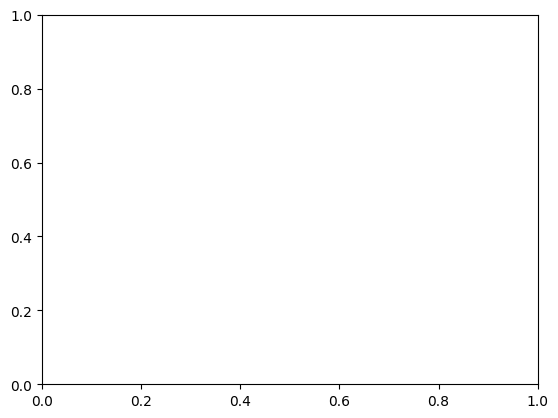

In [65]:
Z = average_linkage_clustering(X2)

fig, axs = plt.subplots(1, 1)
dn = hierarchy.dendrogram(Z, truncate_mode='none', show_leaf_counts=True, no_labels=True)
#plt.axis('off')

axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['bottom'].set_visible(False)

plt.show()